In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

df = pd.read_excel('Bipolar_Detection_revision.xlsx')
df.head()

,Unnamed: 0,id,identifier,disorder_id,q_1,q_2,q_3,q_4,country,province,...,suicide,sweat,tire,tremble,uncomfortable,violence,weight,withdrawal,worry,sum_symptom
0,5,5,$2y$10$UZMQfpEw7xNdyHc2pNVGdel.fiOY.AT5NgdXJJ4...,0,Myself,NaN,NaN,Prefer not to answer,Indonesia,Jakarta,...,0,0,0,0,0,0,0,0,1,1
1,6,6,$2y$10$5vHnGgo7lDDkj2IA0DvebuMSf75Uuj5nz4h5IfT...,0,Someone,Family member,NaN,Male,Indonesia,Bali,...,0,0,0,0,0,0,0,0,0,2
2,10,10,$2y$10$uiSPanZYBtNt.MHg.dF43uq9X.EegmRpMDnsTcZ...,0,Myself,NaN,NaN,Male,Indonesia,Bali,...,0,0,0,0,0,0,0,0,0,1
3,11,11,$2y$10$VY.Q.5Yvgmtw/LuA7fjks.HSts6f0tOcZfgWpl7...,0,Someone,Friend,NaN,Male,Indonesia,Dki jakarta,...,0,0,0,1,0,0,0,0,0,2
4,12,12,$2y$10$Aj.svLPOdyiQWCYlsMesF.uiUtmt6Nllh1JITVD...,0,Someone,Friend,NaN,Prefer not to answer,Indonesia,Jawa barat,...,0,0,0,0,0,0,0,0,0,1


In [2]:
df['disorder_id'].value_counts()

,count
disorder_id,
0,156
1,56


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'identifier', 'disorder_id', 'q_1', 'q_2', 'q_3',
       'q_4', 'country', 'province',
       ...
       'suicide', 'sweat', 'tire', 'tremble', 'uncomfortable', 'violence',
       'weight', 'withdrawal', 'worry', 'sum_symptom'],
      dtype='object', length=118)

In [4]:
df1 = df.drop(columns = ['city','Unnamed: 0', 'id', 'identifier', 'q_1', 'q_2', 'q_3',
       'q_4', 'country', 'province', 'q_6','q_6_2','q_7','q_7_2','q_8','q_9','q_10','q_11','q_12',
      'q_13','q_14'	,'q_add_1',	'q_add_2',	'q_add_2_2',	'q_15',	'q_16',	'q_17',	'q_18',	'q_19',
      'q_20',	'q_21',	'q_22',	'q_23',	'q_24',	'q_25',	'q_26',	'q_27',	'q_27_2',	'q_28',	'q_29',	'q_30',
      'q_31',	'q_32',	'q_extra', 'lang', 'deleted_at','created_at',	'updated_at', 'sum_symptom','contact','pain'])

In [5]:
df1.columns

Index(['disorder_id', 'abusive', 'addict', 'alcohol', 'anger', 'anxious',
       'apathy', 'appetite', 'back', 'balance', 'breathe', 'chest',
       'communicate', 'concentrate', 'confuse', 'cry', 'delusion', 'depress',
       'distrust', 'dizzy', 'drug', 'dysarthria', 'eat', 'echolalia',
       'emotion', 'empty', 'excess', 'faint', 'fear', 'fluctuation', 'forget',
       'gout', 'guilt', 'harm', 'hatred', 'headache', 'heartbeat', 'hopeless',
       'impulsive', 'insomnia', 'lazy', 'libido', 'lonely', 'mood', 'motivate',
       'nausea', 'nervous', 'numb', 'obsessive', 'overreact', 'panic',
       'paranoia', 'procrastinate', 'reject', 'respond', 'sad', 'stress',
       'stutter', 'suicide', 'sweat', 'tire', 'tremble', 'uncomfortable',
       'violence', 'weight', 'withdrawal', 'worry'],
      dtype='object')

In [8]:
print(df1.shape)

(212, 67)


In [ ]:
from sklearn.model_selection import train_test_split
X = df1[['abusive', 'addict', 'alcohol', 'anger', 'anxious',
       'apathy', 'appetite', 'back', 'balance', 'breathe', 'chest',
       'communicate', 'concentrate', 'confuse', 'cry', 'delusion',
       'depress', 'distrust', 'dizzy', 'drug', 'dysarthria', 'eat',
       'echolalia', 'emotion', 'empty', 'excess', 'faint', 'fear',
       'fluctuation', 'forget', 'gout', 'guilt', 'harm', 'hatred', 'headache',
       'heartbeat', 'hopeless', 'impulsive', 'insomnia', 'lazy', 'libido',
       'lonely', 'mood', 'motivate', 'nausea', 'nervous', 'numb', 'obsessive',
       'overreact', 'panic', 'paranoia', 'procrastinate', 'reject',
       'respond', 'sad', 'stress', 'stutter', 'suicide', 'sweat', 'tire',
       'tremble', 'uncomfortable', 'violence', 'weight', 'withdrawal',
       'worry']]
Y = df1['disorder_id']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(penalty= 'none', solver='saga',random_state=42)
logistic_regression_model.fit(X_train, Y_train)
predictions = logistic_regression_model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        34
           1       0.54      0.78      0.64         9

    accuracy                           0.81        43
   macro avg       0.74      0.80      0.76        43
weighted avg       0.85      0.81      0.83        43



In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(penalty= 'l1', solver='saga')
logistic_regression_model.fit(X_train, Y_train)
predictions = logistic_regression_model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.70      0.78      0.74         9

    accuracy                           0.88        43
   macro avg       0.82      0.84      0.83        43
weighted avg       0.89      0.88      0.89        43



In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(penalty= 'l2', solver='saga')
logistic_regression_model.fit(X_train, Y_train)
predictions = logistic_regression_model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.67      0.67      0.67         9

    accuracy                           0.86        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.86      0.86      0.86        43



In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5,random_state=42)
logistic_regression_model.fit(X_train, Y_train)
predictions = logistic_regression_model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.70      0.78      0.74         9

    accuracy                           0.88        43
   macro avg       0.82      0.84      0.83        43
weighted avg       0.89      0.88      0.89        43



SVM CLASSIFIER

In [ ]:
#sigmoid kernel
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
SVM_sigmoid = make_pipeline(SVC(kernel = 'sigmoid', probability= True))
SVM_sigmoid.fit(X_train, Y_train)

Pipeline(steps=[('svc', SVC(kernel='sigmoid', probability=True))])

In [ ]:
y_predict_sigmoid=SVM_sigmoid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nSigmoid Classification Report\n')
print(classification_report(Y_test, y_predict_sigmoid))


Sigmoid Classification Report

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.70      0.78      0.74         9

    accuracy                           0.88        43
   macro avg       0.82      0.84      0.83        43
weighted avg       0.89      0.88      0.89        43



In [ ]:
#rbf kernel
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

SVM_rbf = make_pipeline(SVC(kernel = 'rbf'))
SVM_rbf.fit(X_train, Y_train)

Pipeline(steps=[('svc', SVC())])

In [ ]:
y_predict_rbf=SVM_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nRBF Classification Report\n')
print(classification_report(Y_test, y_predict_rbf))


RBF Classification Report

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.83      0.56      0.67         9

    accuracy                           0.88        43
   macro avg       0.86      0.76      0.80        43
weighted avg       0.88      0.88      0.87        43



In [ ]:
#linear kernel
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

SVM_linear = make_pipeline(SVC(kernel = 'linear'))
SVM_linear.fit(X_train, Y_train)

Pipeline(steps=[('svc', SVC(kernel='linear'))])

In [ ]:
y_predict_linear=SVM_linear.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nLinear Classification Report\n')
print(classification_report(Y_test, y_predict_linear))


Linear Classification Report

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.62      0.56      0.59         9

    accuracy                           0.84        43
   macro avg       0.76      0.73      0.74        43
weighted avg       0.83      0.84      0.83        43



In [ ]:
#poly kernel
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

SVM_poly = make_pipeline(SVC(kernel = 'poly'))
SVM_poly.fit(X_train, Y_train)

Pipeline(steps=[('svc', SVC(kernel='poly'))])

In [ ]:
y_predict_poly=SVM_poly.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nPoly Classification Report\n')
print(classification_report(Y_test, y_predict_poly))


Poly Classification Report

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.67      0.22      0.33         9

    accuracy                           0.81        43
   macro avg       0.75      0.60      0.61        43
weighted avg       0.79      0.81      0.77        43



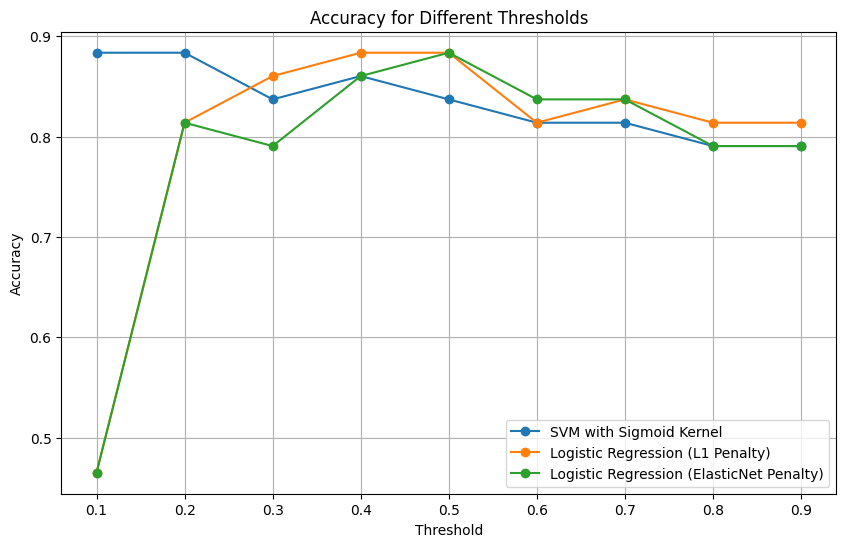

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Thresholds of interest
thresholds = np.linspace(0.1, 0.9, 9)

# Lists to store accuracies for different models
accuracies_svm_sigmoid = []
accuracies_logreg_l1 = []
accuracies_logreg_elasticnet = []

# Assuming SVM sigmoid model and Logistic Regression models are defined elsewhere

# Loop through each threshold
for threshold in thresholds:
    # SVM with Sigmoid Kernel
    y_pred_threshold_sigmoid = (SVM_sigmoid.decision_function(X_test) >= threshold).astype(int)
    accuracy_sigmoid = accuracy_score(Y_test, y_pred_threshold_sigmoid)
    accuracies_svm_sigmoid.append(accuracy_sigmoid)

    # Logistic Regression (L1 penalty)
    logistic_regression_model_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
    logistic_regression_model_l1.fit(X_train, Y_train)
    predictions_l1 = (logistic_regression_model_l1.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    accuracy_l1 = accuracy_score(Y_test, predictions_l1)
    accuracies_logreg_l1.append(accuracy_l1)

    # Logistic Regression (ElasticNet penalty)
    logistic_regression_model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
    logistic_regression_model_elasticnet.fit(X_train, Y_train)
    predictions_elasticnet = (logistic_regression_model_elasticnet.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    accuracy_elasticnet = accuracy_score(Y_test, predictions_elasticnet)
    accuracies_logreg_elasticnet.append(accuracy_elasticnet)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies_svm_sigmoid, marker='o', label='SVM with Sigmoid Kernel')
plt.plot(thresholds, accuracies_logreg_l1, marker='o', label='Logistic Regression (L1 Penalty)')
plt.plot(thresholds, accuracies_logreg_elasticnet, marker='o', label='Logistic Regression (ElasticNet Penalty)')

# Adding titles and labels
plt.title('Accuracy for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

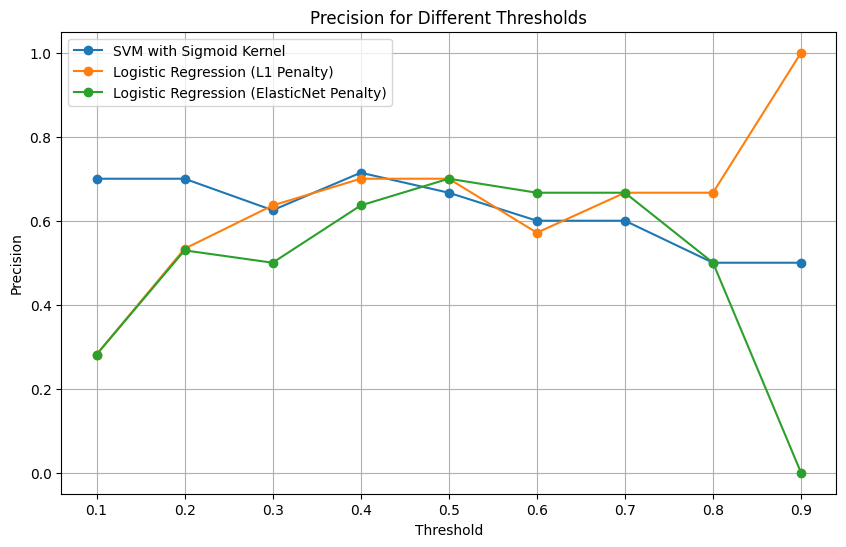

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Thresholds of interest
thresholds = np.linspace(0.1, 0.9, 9)

# Lists to store precisions for different models
precisions_svm_sigmoid = []
precisions_logreg_l1 = []
precisions_logreg_elasticnet = []

# Assuming SVM sigmoid model and Logistic Regression models are defined elsewhere

# Loop through each threshold
for threshold in thresholds:
    # SVM with Sigmoid Kernel
    y_pred_threshold_sigmoid = (SVM_sigmoid.decision_function(X_test) >= threshold).astype(int)
    precision_sigmoid = precision_score(Y_test, y_pred_threshold_sigmoid)
    precisions_svm_sigmoid.append(precision_sigmoid)

    # Logistic Regression (L1 penalty)
    logistic_regression_model_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
    logistic_regression_model_l1.fit(X_train, Y_train)
    predictions_l1 = (logistic_regression_model_l1.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    precision_l1 = precision_score(Y_test, predictions_l1)
    precisions_logreg_l1.append(precision_l1)

    # Logistic Regression (ElasticNet penalty)
    logistic_regression_model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
    logistic_regression_model_elasticnet.fit(X_train, Y_train)
    predictions_elasticnet = (logistic_regression_model_elasticnet.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    precision_elasticnet = precision_score(Y_test, predictions_elasticnet)
    precisions_logreg_elasticnet.append(precision_elasticnet)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions_svm_sigmoid, marker='o', label='SVM with Sigmoid Kernel')
plt.plot(thresholds, precisions_logreg_l1, marker='o', label='Logistic Regression (L1 Penalty)')
plt.plot(thresholds, precisions_logreg_elasticnet, marker='o', label='Logistic Regression (ElasticNet Penalty)')

# Adding titles and labels
plt.title('Precision for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

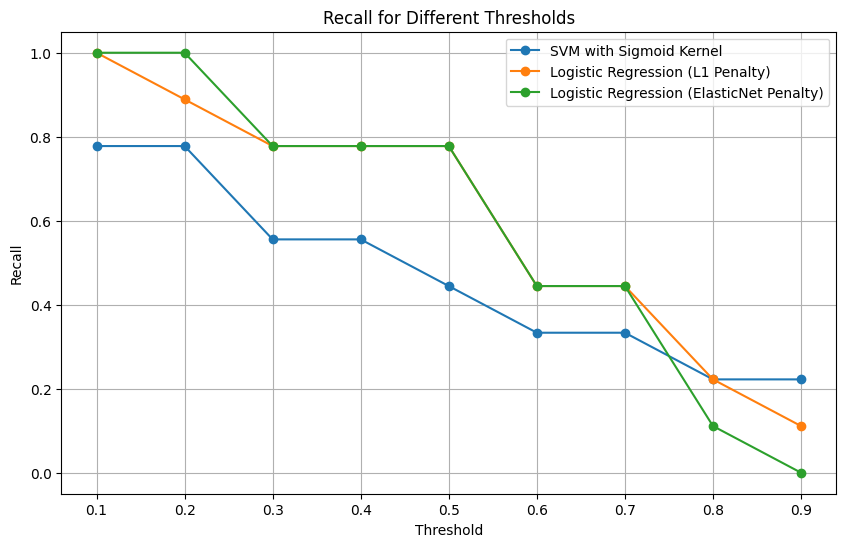

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Thresholds of interest
thresholds = np.linspace(0.1, 0.9, 9)

# Lists to store recalls for different models
recalls_svm_sigmoid = []
recalls_logreg_l1 = []
recalls_logreg_elasticnet = []

# Assuming SVM sigmoid model and Logistic Regression models are defined elsewhere

# Loop through each threshold
for threshold in thresholds:
    # SVM with Sigmoid Kernel
    y_pred_threshold_sigmoid = (SVM_sigmoid.decision_function(X_test) >= threshold).astype(int)
    recall_sigmoid = recall_score(Y_test, y_pred_threshold_sigmoid)
    recalls_svm_sigmoid.append(recall_sigmoid)

    # Logistic Regression (L1 penalty)
    logistic_regression_model_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
    logistic_regression_model_l1.fit(X_train, Y_train)
    predictions_l1 = (logistic_regression_model_l1.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    recall_l1 = recall_score(Y_test, predictions_l1)
    recalls_logreg_l1.append(recall_l1)

    # Logistic Regression (ElasticNet penalty)
    logistic_regression_model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
    logistic_regression_model_elasticnet.fit(X_train, Y_train)
    predictions_elasticnet = (logistic_regression_model_elasticnet.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    recall_elasticnet = recall_score(Y_test, predictions_elasticnet)
    recalls_logreg_elasticnet.append(recall_elasticnet)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls_svm_sigmoid, marker='o', label='SVM with Sigmoid Kernel')
plt.plot(thresholds, recalls_logreg_l1, marker='o', label='Logistic Regression (L1 Penalty)')
plt.plot(thresholds, recalls_logreg_elasticnet, marker='o', label='Logistic Regression (ElasticNet Penalty)')

# Adding titles and labels
plt.title('Recall for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

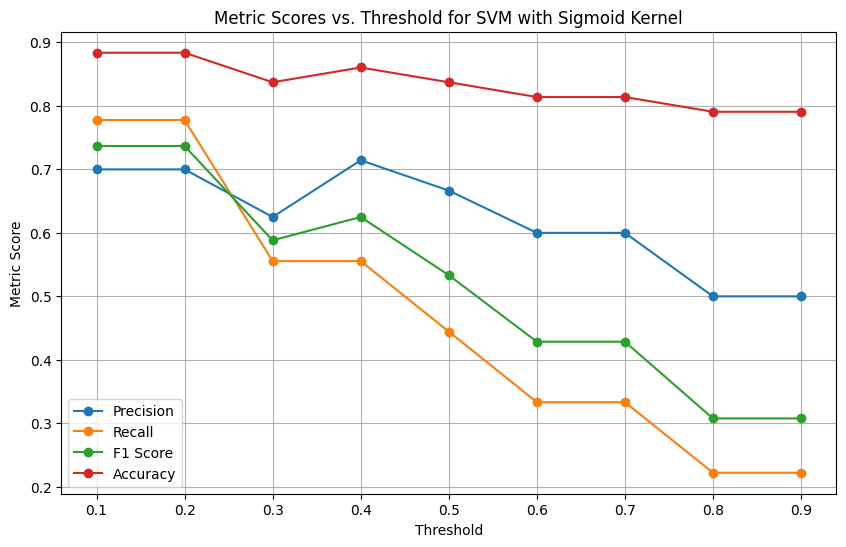

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Threshold yang diinginkan
thresholds = np.linspace(0.1, 0.9, 9)

# Inisialisasi list untuk menyimpan nilai metrik
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Menghitung metrik untuk setiap threshold
for threshold in thresholds:
    # Predictions untuk model SVM dengan kernel sigmoid
    y_pred_threshold_sigmoid = (SVM_sigmoid.decision_function(X_test) >= threshold).astype(int)

    # Menghitung dan menyimpan nilai metrik
    precisions.append(precision_score(Y_test, y_pred_threshold_sigmoid))
    recalls.append(recall_score(Y_test, y_pred_threshold_sigmoid))
    f1_scores.append(f1_score(Y_test, y_pred_threshold_sigmoid))
    accuracies.append(accuracy_score(Y_test, y_pred_threshold_sigmoid))

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, f1_scores, marker='o', label='F1 Score')
plt.plot(thresholds, accuracies, marker='o', label='Accuracy')

# Tambahkan judul dan label sumbu
plt.title('Metric Scores vs. Threshold for SVM with Sigmoid Kernel')
plt.xlabel('Threshold')
plt.ylabel('Metric Score')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()

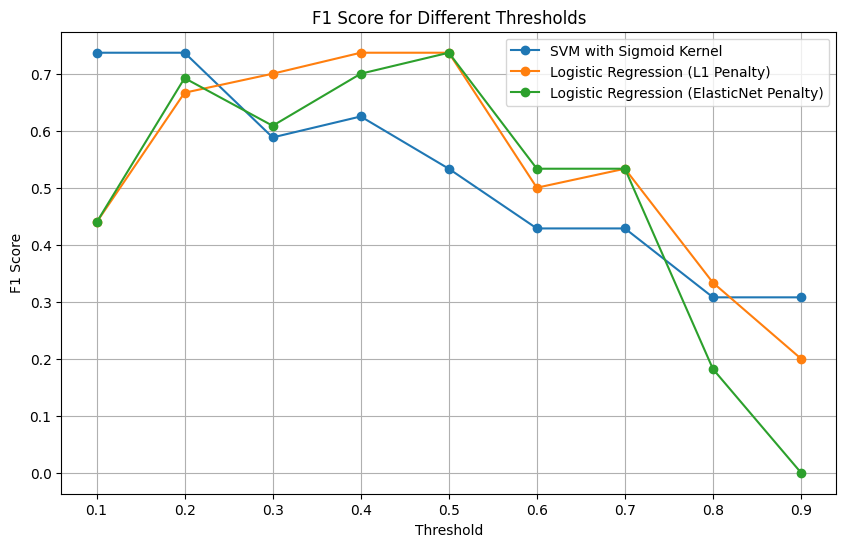

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Thresholds of interest
thresholds = np.linspace(0.1, 0.9, 9)

# Lists to store F1 scores for different models
f1_scores_svm_sigmoid = []
f1_scores_logreg_l1 = []
f1_scores_logreg_elasticnet = []

# Assuming SVM sigmoid model and Logistic Regression models are defined elsewhere

# Loop through each threshold
for threshold in thresholds:
    # SVM with Sigmoid Kernel
    y_pred_threshold_sigmoid = (SVM_sigmoid.decision_function(X_test) >= threshold).astype(int)
    f1_sigmoid = f1_score(Y_test, y_pred_threshold_sigmoid)
    f1_scores_svm_sigmoid.append(f1_sigmoid)

    # Logistic Regression (L1 penalty)
    logistic_regression_model_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
    logistic_regression_model_l1.fit(X_train, Y_train)
    predictions_l1 = (logistic_regression_model_l1.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    f1_l1 = f1_score(Y_test, predictions_l1)
    f1_scores_logreg_l1.append(f1_l1)

    # Logistic Regression (ElasticNet penalty)
    logistic_regression_model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
    logistic_regression_model_elasticnet.fit(X_train, Y_train)
    predictions_elasticnet = (logistic_regression_model_elasticnet.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    f1_elasticnet = f1_score(Y_test, predictions_elasticnet)
    f1_scores_logreg_elasticnet.append(f1_elasticnet)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores_svm_sigmoid, marker='o', label='SVM with Sigmoid Kernel')
plt.plot(thresholds, f1_scores_logreg_l1, marker='o', label='Logistic Regression (L1 Penalty)')
plt.plot(thresholds, f1_scores_logreg_elasticnet, marker='o', label='Logistic Regression (ElasticNet Penalty)')

# Adding titles and labels
plt.title('F1 Score for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#pip install shap

In [ ]:
#top 10 svm sigmoid
import shap

# Load JS visualization code to notebook
shap.initjs()

# Create SHAP explainer object
explainer = shap.Explainer(SVM_sigmoid.named_steps['svc'].predict_proba, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

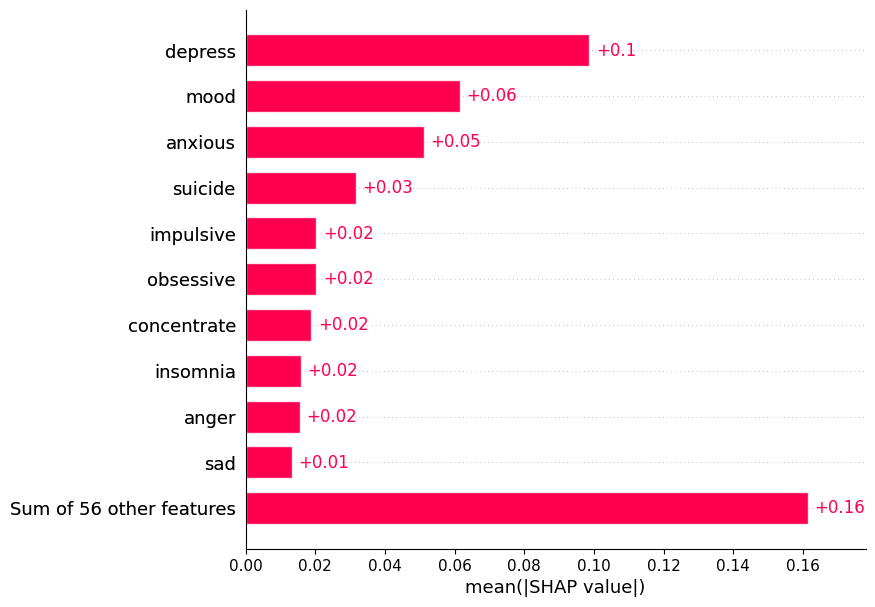

In [ ]:
# Create bar plot showing the top 10 features
shap.plots.bar(shap_values[:, :, 1], max_display=11,)

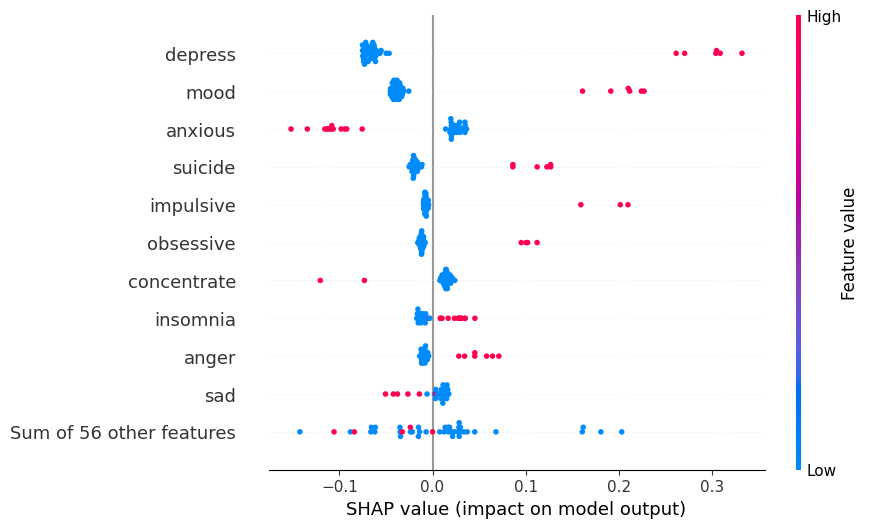

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1],max_display=11)

In [ ]:
# TOP 10 LOGREG elasticnet
import shap
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model with elasticnet penalty
logistic_regression_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
logistic_regression_elasticnet.fit(X_train, Y_train)

# Load JS visualization code to notebook
shap.initjs()

# Create SHAP explainer object
explainer = shap.Explainer(logistic_regression_elasticnet.predict_proba, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

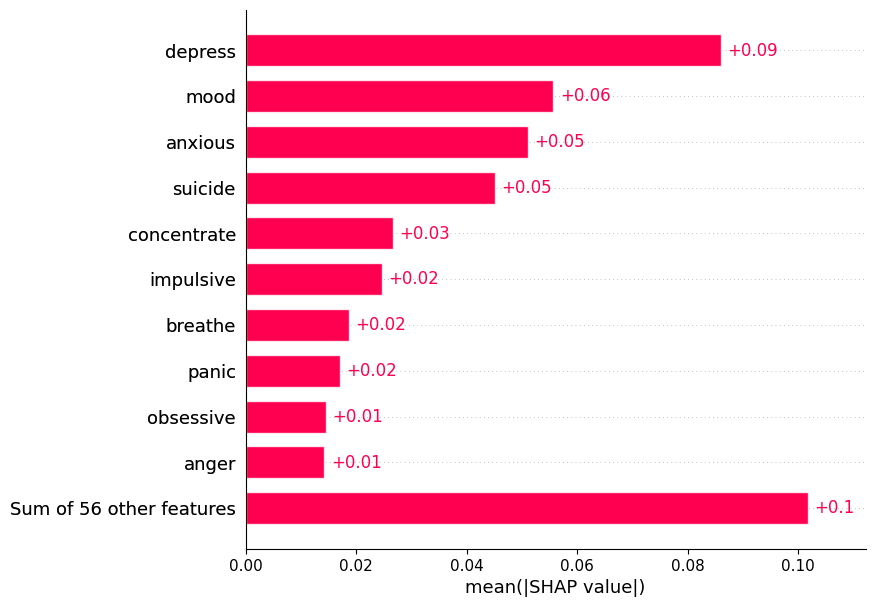

In [ ]:
# Create bar plot showing the top 10 features
shap.plots.bar(shap_values[:, :, 1], max_display=11,)

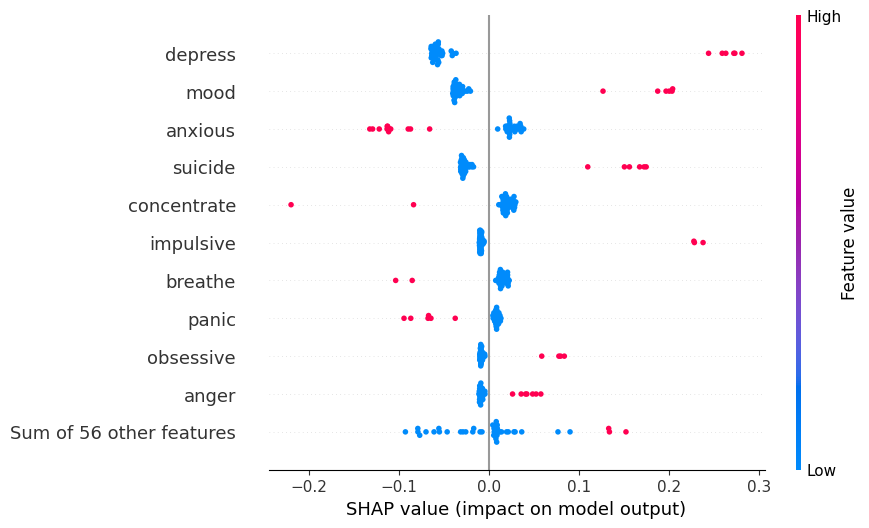

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1],max_display=11)

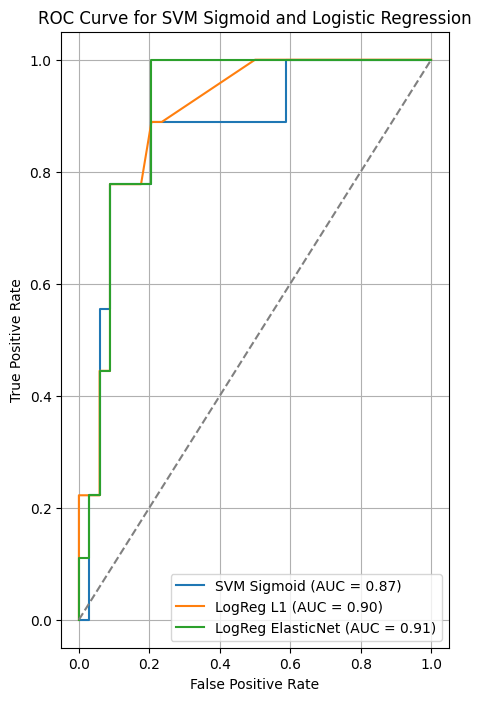

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Function to compute ROC AUC and plot for SVM with different kernels
def plot_roc_auc(model, model_name, X_test, Y_test):
    # Computing prediction probabilities for the model
    y_proba = model.decision_function(X_test)
    # Computing fpr (False Positive Rate), tpr (True Positive Rate), and thresholds
    fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
    # Computing AUC (Area Under Curve)
    auc_score = auc(fpr, tpr)
    # Plotting ROC AUC
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, auc_score))

# Creating a plot for ROC AUC for SVM sigmoid, Logistic Regression with L1 penalty, and Logistic Regression with ElasticNet penalty
plt.figure(figsize=(5, 8))

# Plotting for SVM with sigmoid kernel
plot_roc_auc(SVM_sigmoid, 'SVM Sigmoid', X_test, Y_test)

# Plotting for Logistic Regression with L1 penalty
logreg_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
logreg_l1.fit(X_train, Y_train)
plot_roc_auc(logreg_l1, 'LogReg L1', X_test, Y_test)

# Plotting for Logistic Regression with ElasticNet penalty
logreg_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
logreg_elasticnet.fit(X_train, Y_train)
plot_roc_auc(logreg_elasticnet, 'LogReg ElasticNet', X_test, Y_test)

# Plotting the reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling axes and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Sigmoid and Logistic Regression')

# Displaying legend
plt.legend(loc='lower right')

# Displaying the plot
plt.grid(True)
plt.show()

Fitur: depress, Skor: 1.66769
Fitur: impulsive, Skor: 1.26593
Fitur: mood, Skor: 1.21852
Fitur: suicide, Skor: 1.02610
Fitur: harm, Skor: 0.88104


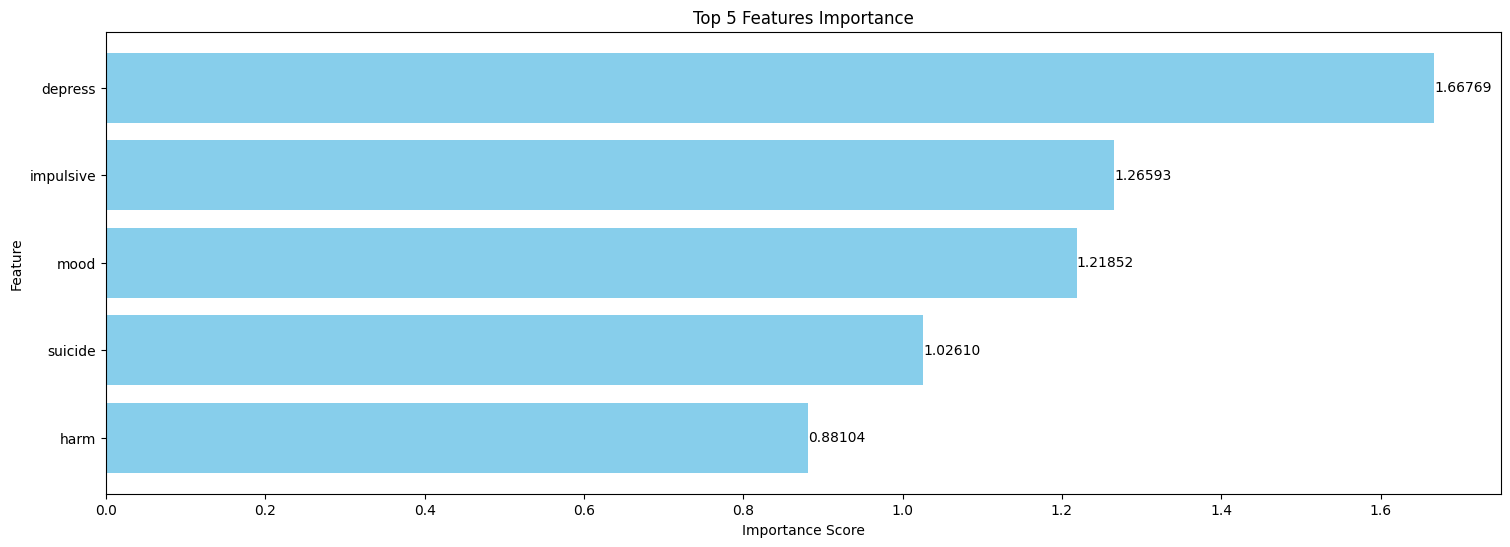

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5,random_state=42)
logistic_regression_model.fit(X_train, Y_train)
predictions = logistic_regression_model.predict(X_test)
importance = logistic_regression_model.coef_[0]
# Mengurutkan fitur importance berdasarkan nilai absolutnya
sorted_indices = importance.argsort()
sorted_importance = importance[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Memilih 5 fitur dengan koefisien positif terbesar
top_positive_features = sorted(zip(sorted_features, sorted_importance), key=lambda x: -x[1])[:5]

# Menampilkan top 5 fitur dengan koefisien positif terbesar
for feature, score in top_positive_features:
    print('Fitur: %s, Skor: %.5f' % (feature, score))

# Plot fitur importance untuk top 5 fitur dengan koefisien positif terbesar
top_positive_features_names = [f[0] for f in top_positive_features]
top_positive_scores = [f[1] for f in top_positive_features]
# Plot fitur importance untuk top 5 fitur dengan koefisien positif terbesar
plt.figure(figsize=(18, 6))
bars = plt.barh(top_positive_features_names, top_positive_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 5 Features Importance')
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar fitur teratas muncul di bagian atas

# Menambahkan skor fitur sebagai legenda
for bar, score in zip(bars, top_positive_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.5f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()


Feature: depress, Score: 1.32406
Feature: impulsive, Score: 1.20634
Feature: harm, Score: 1.13993
Feature: mood, Score: 1.10123
Feature: drug, Score: 0.84354


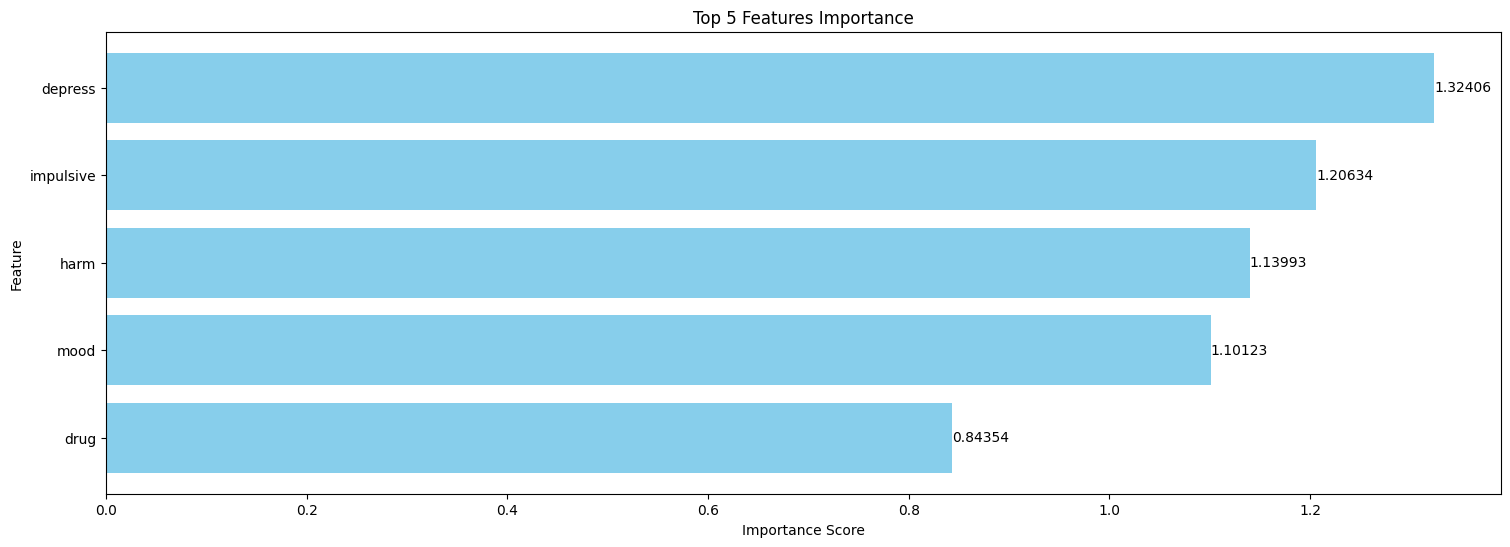

In [ ]:
# Import libraries
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings('ignore')

# Create SVM model with sigmoid kernel
SVM_sigmoid = make_pipeline(SVC(kernel='linear', probability=True))

# Fit the model to the training data
SVM_sigmoid.fit(X_train, Y_train)

# Predictions
predictions = SVM_sigmoid.predict(X_test)

# Get coefficients (importance) of features
importance = SVM_sigmoid[-1].coef_[0]

# Sort feature importance based on absolute values
sorted_indices = importance.argsort()
sorted_importance = importance[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Select the top 5 features with the largest positive coefficients
top_positive_features = sorted(zip(sorted_features, sorted_importance), key=lambda x: -x[1])[:5]

# Display the top 5 features with the largest positive coefficients
for feature, score in top_positive_features:
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot the feature importance for the top 5 features with the largest positive coefficients
top_positive_features_names = [f[0] for f in top_positive_features]
top_positive_scores = [f[1] for f in top_positive_features]

plt.figure(figsize=(18, 6))
bars = plt.barh(top_positive_features_names, top_positive_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 5 Features Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top features at the top

# Add feature scores as labels
for bar, score in zip(bars, top_positive_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.5f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [ ]:
# Import libraries
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings('ignore')

# Create SVM model with sigmoid kernel
SVM_sigmoid = make_pipeline(SVC(kernel='sigmoid', probability=True))

# Fit the model to the training data
SVM_sigmoid.fit(X_train, Y_train)

# Predictions
predictions = SVM_sigmoid.predict(X_test)

# Get coefficients (importance) of features
importance = SVM_sigmoid[-1].coef_[0]

# Sort feature importance based on absolute values
sorted_indices = importance.argsort()
sorted_importance = importance[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Select the top 5 features with the largest positive coefficients
top_positive_features = sorted(zip(sorted_features, sorted_importance), key=lambda x: -x[1])[:5]

# Display the top 5 features with the largest positive coefficients
for feature, score in top_positive_features:
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot the feature importance for the top 5 features with the largest positive coefficients
top_positive_features_names = [f[0] for f in top_positive_features]
top_positive_scores = [f[1] for f in top_positive_features]

plt.figure(figsize=(18, 6))
bars = plt.barh(top_positive_features_names, top_positive_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 5 Features Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top features at the top

# Add feature scores as labels
for bar, score in zip(bars, top_positive_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.5f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()

AttributeError: coef_ is only available when using a linear kernel

In [ ]:
pip install lime

In [ ]:
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline

# Membuat pipeline untuk model SVM dengan kernel sigmoid
SVM_sigmoid_pipeline = make_pipeline(SVM_sigmoid.named_steps['svc'])

# Inisialisasi LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=feature_names,
                                                   class_names=['0', '1'],
                                                   discretize_continuous=True)

# Pilih contoh data untuk dijelaskan
idx = 0  # Ganti indeks sesuai dengan data yang ingin dijelaskan

# Mendapatkan penjelasan dari LIME untuk contoh data yang dipilih
exp = explainer.explain_instance(X_test.iloc[idx],
                                 SVM_sigmoid_pipeline.predict_proba,
                                 num_features=10,
                                 top_labels=1)

# Plot penjelasan menggunakan LIME
exp.as_pyplot_figure()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat grid titik untuk evaluasi model
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Memprediksi kelas untuk setiap titik grid
Z = SVM_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot batas keputusan dan titik data
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Plot for SVM with Sigmoid Kernel')
plt.show()
